# Face Detect

This demo use **Microsoft Azure Cognitive Services**.

![landmarks](https://docs.microsoft.com/pt-br/azure/cognitive-services/face/images/landmarks.1.jpg)

In [7]:
import time 
import urllib
import requests
import cv2
import operator
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline 

_url = 'https://westus.api.cognitive.microsoft.com/face/v1.0/detect'
_key = '__KEY__'
_maxNumRetries = 10

In [8]:
def processRequest( json, data, headers, params ):

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json()['error']['message'] ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json()['error']['message'] ) )

        break
        
    return result

In [9]:
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    
    colorRec = (255,0,0)
    
    for currFace in result:
        if currFace['faceAttributes']['gender'] == 'male': 
            colorRec = (255,0,0) 
        else: 
            colorRec = (153,204,50)
        
        faceRectangle = currFace['faceRectangle']
        
        cv2.rectangle( img,(faceRectangle['left'],faceRectangle['top']),
                           (faceRectangle['left']+faceRectangle['width'], faceRectangle['top'] + faceRectangle['height']),
                       color = colorRec, thickness = 5 )
        
        currEmotion = currFace['faceAttributes']['age']

        textToWrite = "%s" % ( currEmotion )
        
        cv2.putText( img, textToWrite, (faceRectangle['left'],faceRectangle['top']-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, colorRec, 2 )

        # Obtem os dados da face
        fl = currFace['faceLandmarks']
        
        color = (255,255,255)
        
        # Olho esquerdo
        cv2.circle(img, (int(fl['pupilLeft']['x']), int(fl['pupilLeft']['y'])), 10, color, -1)
        
        # Olho direito
        cv2.circle(img, (int(fl['pupilRight']['x']), int(fl['pupilRight']['y'])), 10, color, -1)
        
        # Nariz
        cv2.circle(img, (int(fl['noseTip']['x']), int(fl['noseTip']['y'])), 10, color, -1)
    
        # Boca
        cv2.circle(img, (int(fl['mouthLeft']['x']), int(fl['mouthLeft']['y'])), 10, color, -1)
        cv2.circle(img, (int(fl['mouthRight']['x']), int(fl['mouthRight']['y'])), 10, color, -1)

In [10]:
from IPython.display import Image as ipImage, display

urlImage = 'http://meriatblob.blob.core.windows.net/demos/cognitive/faces.jpeg'

img = ipImage(url=urlImage, width=600)
display(img)

In [11]:
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 
data = None
#params = None
params = urllib.parse.urlencode({
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'true',
    'returnFaceAttributes': 'age,gender,smile,facialHair,headPose,glasses',
})

result = processRequest( json, data, headers, params )

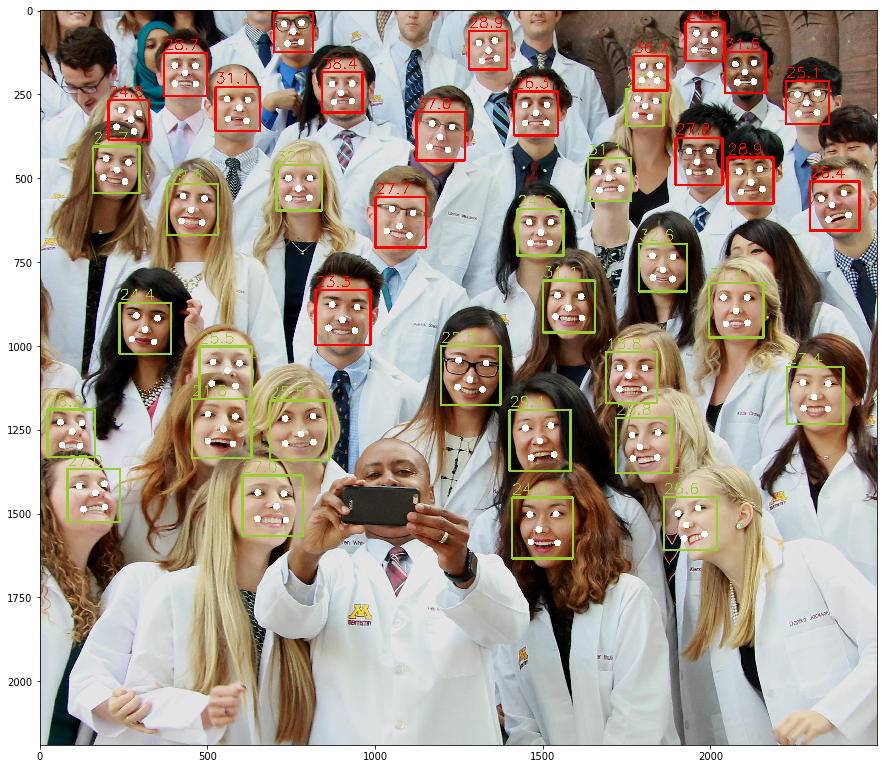

In [12]:
if result is not None:
    # Load the original image, fetched from the URL
    arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
    img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )

In [13]:
import json

print(json.dumps(result, indent=2, sort_keys=True))

[
  {
    "faceAttributes": {
      "age": 29.4,
      "facialHair": {
        "beard": 0.0,
        "moustache": 0.0,
        "sideburns": 0.0
      },
      "gender": "female",
      "glasses": "NoGlasses",
      "headPose": {
        "pitch": 0.0,
        "roll": -7.5,
        "yaw": -0.1
      },
      "smile": 0.939
    },
    "faceId": "7627467d-ac76-4357-88d5-6e6016b80dcf",
    "faceLandmarks": {
      "eyeLeftBottom": {
        "x": 1447.4,
        "y": 1249.3
      },
      "eyeLeftInner": {
        "x": 1459.5,
        "y": 1245.7
      },
      "eyeLeftOuter": {
        "x": 1435.0,
        "y": 1247.5
      },
      "eyeLeftTop": {
        "x": 1447.0,
        "y": 1244.1
      },
      "eyeRightBottom": {
        "x": 1525.3,
        "y": 1242.0
      },
      "eyeRightInner": {
        "x": 1512.0,
        "y": 1241.4
      },
      "eyeRightOuter": {
        "x": 1536.3,
        "y": 1237.2
      },
      "eyeRightTop": {
        "x": 1524.0,
        "y": 1236.3
      },